__Subject:__ Topics of Tweets of US Congress through the Lens of Campaign Finance

__Date:__ 09/08/2018

__Name:__ Edmund D. Chitwood
***

__Summary:__<br>
<br>The following Notebook 
- reads in Senator Amy Klobuchar's Tweets,
- reads them into a Pandas DataFrame, and
- performs EDA on on the Tweets.
***

In [47]:
import pandas as pd

In [48]:
tweets = pd.read_csv('senate_data/amyklobuchar_tweets.csv',sep=';',header=None,)

In [52]:
tweets.columns = (['username','date','retweets','favorites','text','mentions',\
                   'hashtags','id','permalink',''])

In [23]:
tweets.head()

,username,date,retweets,favorites,text,mentions,hashtags,id,permalink,
0,amyklobuchar,2018-09-06 16:15:52,264,947,"“A popular Government, without popular informa...",NaN,NaN,1037736146019729409,https://twitter.com/amyklobuchar/status/103773...,False
1,amyklobuchar,2018-09-06 01:35:41,469,2034,Yep. I think we should get out of the last cen...,NaN,NaN,1037514643340775424,https://twitter.com/amyklobuchar/status/103751...,False
2,amyklobuchar,2018-09-05 21:31:45,975,2657,Yes..Hidden in all the legal density are 3 key...,NaN,#Pattern,1037453252495855616,https://twitter.com/amyklobuchar/status/103745...,False
3,amyklobuchar,2018-09-05 16:19:55,908,2522,Re Supreme Court: The 4 “confidential” 2002 do...,NaN,NaN,1037374780725440513,https://twitter.com/amyklobuchar/status/103737...,False
4,amyklobuchar,2018-09-05 13:28:35,236,946,Today’s Senate intel hearing will discuss the ...,NaN,NaN,1037331662009446402,https://twitter.com/amyklobuchar/status/103733...,False


In [25]:
tweets.describe()

,retweets,favorites,id
count,6969.000000,6969.000000,6.969000e+03
mean,78.599656,268.317406,6.767286e+17
std,516.227907,1660.230036,2.509902e+17
min,0.000000,0.000000,1.676740e+17
25%,6.000000,8.000000,5.082657e+17
50%,15.000000,38.000000,7.156280e+17
75%,43.000000,201.000000,8.873667e+17
max,30789.000000,92982.000000,1.037736e+18


In [53]:
# First five Tweets
# Note: Tweets contain URLs of hyperlinks
for tweet in tweets['text'][:5]:
    print(tweet, '\n')

“A popular Government, without popular information, or the means of acquiring it, is but a prologue to a farce or a tragedy; or perhaps both.” Those are Madison’s words I quoted in the hearing today. 

Yep. I think we should get out of the last century & televise Supreme Court hearings. Audio tapes are good but when the Court is deciding people’s health care & rights to marry & vote, all should watch, not just people who can afford to come to D.C. &be lucky enough to get a seat https:// twitter.com/frankthorp/sta tus/1037507006603702272 … 

Yes..Hidden in all the legal density are 3 key consumer issues I focused on: his overruled opinion finding the Consumer Financial Protection Bureau unconstitutional; his dissent in which he tried to strike down net neutrality rules; & his pro-merger antitrust opinions #Pattern https:// twitter.com/soundpolicy/st atus/1037423063640551424 … 

Re Supreme Court: The 4 “confidential” 2002 docs I got made public are a treasure trove on campaign finance, i

In [55]:
# Get number of characters in each Tweet
tweets['length'] = tweets.text.apply(lambda x: len(x))

In [28]:
# Most Tweets are longer than 140 characters, presumably because of text 
# rendering of URLs, images, etc.
tweets.describe()

,retweets,favorites,id,length
count,6969.000000,6969.000000,6.969000e+03,6969.000000
mean,78.599656,268.317406,6.767286e+17,163.349261
std,516.227907,1660.230036,2.509902e+17,66.712853
min,0.000000,0.000000,1.676740e+17,1.000000
25%,6.000000,8.000000,5.082657e+17,128.000000
50%,15.000000,38.000000,7.156280e+17,139.000000
75%,43.000000,201.000000,8.873667e+17,187.000000
max,30789.000000,92982.000000,1.037736e+18,594.000000


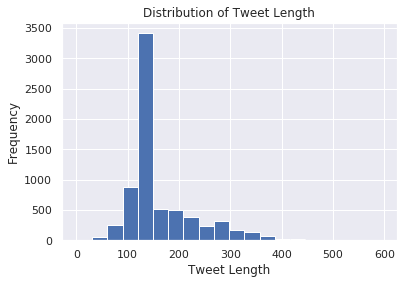

In [29]:
# Import seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

# Create a histogram of all Tweet lengths
ax = tweets.length.hist(bins=20)
ax.set(xlabel='Tweet Length', ylabel='Frequency', 
       title='Distribution of Tweet Length');

In [56]:
# Longest Tweet
tweets.sort_values(by='length',ascending=False).iloc[0]['text']

'Much better than the Betsy DeVos 60 minutes interview! thanks Kate McKinnon!! Watch Weekend Update: Betsy DeVos from Saturday Night Live on http:// NBC.com http:// nbc.app.link/?campaign=Ever green_Video_Details&channel=dotcom&mParticle%20ID%3A%20Device=-1851367357157046926&mParticle%20ID=Anonymous&Canonical%20URL=https%3A%2F%2Fwww.nbc.com%2Fsaturday-night-live%2Fvideo%2Fweekend-update-betsy-devos%2F3686084&ios_deeplink_path=video%2F3686084&android_deeplink_path=video%2F3686084&%24desktop_url=https%3A%2F%2Fwww.nbc.com%2Fsaturday-night-live%2Fvideo%2Fweekend-update-betsy-devos%2F3686084 …'

In [57]:
# Shortest Tweet just says 'M'.
tweets.sort_values(by='length',ascending=True).iloc[0]['text']

'M'

In [34]:
# Most Favorited Tweet
tweets.sort_values(by='favorites',ascending=False).iloc[0]['text']

'Breaking: the U.S. Senate just voted 52-47 vote on the bill to restore #NetNeutrality and to protect a fair and open internet. Amazing victory for consumers, small businesses and rural communities. Final vote at 3. Watch on CSpan!'

In [32]:
# Most Retweeted Tweet
tweets.sort_values(by='retweets',ascending=False).iloc[0]['text']

'Breaking: the U.S. Senate just voted 52-47 vote on the bill to restore #NetNeutrality and to protect a fair and open internet. Amazing victory for consumers, small businesses and rural communities. Final vote at 3. Watch on CSpan!'

In [58]:
# Longest Tweet
tweets.sort_values(by='length',ascending=False).iloc[0]['text']

'Much better than the Betsy DeVos 60 minutes interview! thanks Kate McKinnon!! Watch Weekend Update: Betsy DeVos from Saturday Night Live on http:// NBC.com http:// nbc.app.link/?campaign=Ever green_Video_Details&channel=dotcom&mParticle%20ID%3A%20Device=-1851367357157046926&mParticle%20ID=Anonymous&Canonical%20URL=https%3A%2F%2Fwww.nbc.com%2Fsaturday-night-live%2Fvideo%2Fweekend-update-betsy-devos%2F3686084&ios_deeplink_path=video%2F3686084&android_deeplink_path=video%2F3686084&%24desktop_url=https%3A%2F%2Fwww.nbc.com%2Fsaturday-night-live%2Fvideo%2Fweekend-update-betsy-devos%2F3686084 …'